In [1]:
import pandas as pd

import selenium as sel

import time

import numpy as np

from matplotlib import pyplot as plt

# Librerias tratamiento de datos y representación

from astroML.datasets import fetch_sdss_spectrum # pip install astroML[all]

import astropy.io.fits as fits # pip install Astropy[all]

#from astropy.modeling import models, fitting
#
#from astropy import units as u
#
#from specutils.spectra import Spectrum1D, SpectralRegion
#
#from specutils.fitting import fit_generic_continuum 

# Librerías astro

""" from selenium import webdriver

from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By

from selenium.common.exceptions import NoSuchElementException

from selenium.webdriver.common.keys import Keys

from selenium.webdriver.chrome.options import Options

from selenium.webdriver.support.wait import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC


options = Options()
options.headless = True 

driver = webdriver.Chrome(ChromeDriverManager().install()) """



' from selenium import webdriver\n\nfrom webdriver_manager.chrome import ChromeDriverManager\n\nfrom selenium.webdriver.common.by import By\n\nfrom selenium.common.exceptions import NoSuchElementException\n\nfrom selenium.webdriver.common.keys import Keys\n\nfrom selenium.webdriver.chrome.options import Options\n\nfrom selenium.webdriver.support.wait import WebDriverWait\n\nfrom selenium.webdriver.support import expected_conditions as EC\n\n\noptions = Options()\noptions.headless = True \n\ndriver = webdriver.Chrome(ChromeDriverManager().install()) '

# Primera opción y la que funcionó una vez

url1 = "https://dr16.sdss.org/optical/spectrum/search"          
driver.get(url1)

plate = []

mjd = []

fiber = []

tipo = []

sdss = driver.find_element(By.XPATH, '//*[@id="basic"]/fieldset/div[1]/div[2]/div/div[1]/label[2]')
sdss.click()

star = driver.find_element(By.XPATH, '//*[@id="basic"]/fieldset/div[1]/div[2]/div/div[2]/label[3]')
star.click()

buscar = driver.find_element(By.XPATH, '//*[@id="basic_search"]')
buscar.click()

spectros = driver.find_element(By.XPATH, '//*[@id="results"]/li[2]')
spectros.click()

time.sleep(70)

for i in range(0,3):
    time.sleep(50)
    
    # Obteniendo los elementos de la tabla
    
    plate.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="Plate"]]/td').text))
    mjd.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="MJD"]]/td').text))
    fiber.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="FiberID"]]/td').text))
    tipo.append(driver.find_element(By.XPATH, '//tr[./th[text()="Subclass"]]/td').text)
    
    # Haciendo click en el botón "Next"
    next = driver.find_element(By.XPATH, '//*[@id="next"]')
    next.click()

driver.quit()

print(plate)
print(mjd)
print(fiber)
print(tipo)


# 2 opción que he probado


url1 = "https://dr16.sdss.org/optical/spectrum/search"          
driver.get(url1)

time.sleep(70)

plate = []

mjd = []

fiber = []

tipo = []

sdss = driver.find_element(By.XPATH, '//*[@id="basic"]/fieldset/div[1]/div[2]/div/div[1]/label[2]')
sdss.click()

star = driver.find_element(By.XPATH, '//*[@id="basic"]/fieldset/div[1]/div[2]/div/div[2]/label[3]')
star.click()

buscar = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="basic_search"]')))
buscar.click()

spectros = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="results"]/li[2]')))
spectros.click()


for i in range(0,3):
    time.sleep(50)
    
    # Obteniendo los elementos de la tabla
    
    plate.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="Plate"]]/td').text))
    mjd.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="MJD"]]/td').text))
    fiber.append(int(driver.find_element(By.XPATH, '//tr[./th[text()="FiberID"]]/td').text))
    tipo.append(driver.find_element(By.XPATH, '//tr[./th[text()="Subclass"]]/td').text)
    
    # Haciendo click en el botón "Next"
    next = driver.find_element(By.XPATH, '//*[@id="next"]')
    next.click()

driver.quit()

print(plate)
print(mjd)
print(fiber)
print(tipo)


In [2]:
df = pd.read_csv("C:/Users/alvar/Downloads/optical_search_353180.csv", nrows = 10)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       10 non-null     int64  
 1   mjd          10 non-null     int64  
 2   fiberid      10 non-null     int64  
 3   run2d        10 non-null     object 
 4   specobj_id   10 non-null     object 
 5   ra           10 non-null     object 
 6   dec          10 non-null     object 
 7   sn_median_r  10 non-null     float64
 8   z            10 non-null     float64
 9   zerr         10 non-null     float64
 10  zwarning     10 non-null     int64  
 11  class        10 non-null     object 
 12  subclass     10 non-null     object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ KB


In [3]:

Londa = []

Inten = []

err = []

tipo = []
""" , data_home= """
for index, row in df.iterrows():
    i = row['#plate']
    j = row['mjd']
    k = row['fiberid']
    t = row['subclass']
    spec = fetch_sdss_spectrum(int(i), int(j), int(k))
    
    tipo.append(t)
    Londa.append(spec.wavelength()) # Añadimos la longitud de onda que forma cada espectro en Å
    Inten.append(spec.spectrum) # Añadimos la intensidad que forma cada espectro en [1E-17 erg/cm2/s/Å]
    err.append(spec.error) # Añadimos el error de cada espectro

    

print(tipo)
print(Londa)
print(Inten)
print(err)


["'A0'", "'WD'", "'F2'", "'WD'", "'WD'", "'G2'", "'WD'", "'F5'", "'F5'", "'CV'"]
[array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.657

In [11]:

Datos = []

err = []

tipo = []
"""  , data_home=  """
for index, row in df.iterrows():
    i = row['#plate']
    j = row['mjd']
    k = row['fiberid']
    t = row['subclass']
    spec = fetch_sdss_spectrum(int(i), int(j), int(k))
    
    tipo.append(t)
    Datos.append(np.concatenate((spec.wavelength(), spec.spectrum))) # Añadimos la longitud de onda que forma cada espectro en Å
    err.append(np.concatenate((spec.wavelength(),spec.error))) # Añadimos el error de cada espectro

    

print(tipo)
print(Datos)
print(err) 
max_len = max(len(l) for l in Datos)

# Recorremos la lista de listas y rellenamos con 0 las listas que no cumplan con el tamaño máximo
for i in range(len(Datos)):
    if len(Datos[i]) < max_len:
        Datos[i] = np.append(Datos[i], [0] * (max_len - len(Datos[i])))
    print(Datos[i].shape) 




["'A0'", "'WD'", "'F2'", "'WD'", "'WD'", "'G2'", "'WD'", "'F5'", "'F5'", "'CV'"]
[array([3788.78533748, 3789.65783799, 3790.53053943, ...,    7.17777014,
          7.17784977,    7.17791986]), array([3788.78533748, 3789.65783799, 3790.53053943, ...,   20.9076004 ,
         20.90780067,   20.90800095]), array([3788.78533748, 3789.65783799, 3790.53053943, ...,   36.81570053,
         36.81620026,   36.81679916]), array([3.78878534e+03, 3.78965784e+03, 3.79053054e+03, ...,
       2.91056007e-01, 2.91061014e-01, 2.91067004e-01]), array([3.78878534e+03, 3.78965784e+03, 3.79053054e+03, ...,
       1.96287000e+00, 1.96290004e+00, 1.96292996e+00]), array([3788.78533748, 3789.65783799, 3790.53053943, ...,   49.44919968,
         49.45029831,   49.45140076]), array([3788.78533748, 3789.65783799, 3790.53053943, ...,    5.00658989,
          5.00668001,    5.00677013]), array([3788.78533748, 3789.65783799, 3790.53053943, ...,  280.74899292,
        280.75100708,  280.7539978 ]), array([3788.785337

In [4]:
In = []
Long = []

#err2 = []

tipo2 = []
""" , data_home= """
for index, row in df.iterrows():
    i = row['#plate']
    j = row['mjd']
    k = row['fiberid']
    t = row['subclass']
    spec = fetch_sdss_spectrum(int(i), int(j), int(k))
    tipo2.extend([t]*len(spec.wavelength()))
    for a , b, c in zip(spec.wavelength(), spec.spectrum, spec.error):
        Long.append(a)
        In.append(b)
        #err2.append(k)
    
    
print(len(Long))
print(len(In))
print(len(tipo2))

    

38640
38640
38640


In [16]:
graph = pd.DataFrame({'Longitud de onda [Å]': Londa, 'Intensidad [1E-17 erg/cm2/s/Å]': Inten, 'Error': err, 'Tipo': tipo})

graph.head()

dfGR = graph.copy()

In [12]:
Modelos = pd.DataFrame({'Longitud de onda [Å] VS Intensidad [1E-17 erg/cm2/s/Å]': Datos, 'Longitud de onda [Å] VS Error': err, 'Tipo': tipo})

Modelos.head()

dfML = Modelos.copy()

dfML.head()

,Longitud de onda [Å] VS Intensidad [1E-17 erg/cm2/s/Å],Longitud de onda [Å] VS Error,Tipo
0,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",'A0'
1,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",'WD'
2,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",'F2'
3,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",'WD'
4,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",'WD'


In [7]:
Modelos2 = pd.DataFrame({'Longitud de onda [Å]': Long, 'Intensidad [1E-17 erg/cm2/s/Å]': In, 'Tipo': tipo2})

Modelos2.head()

dfML2 = Modelos2.copy()

dfML2.head()

,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å],Tipo
0,3788.785337,21.111200,'A0'
1,3789.657838,21.103901,'A0'
2,3790.530539,21.096600,'A0'
3,3791.403442,21.089399,'A0'
4,3792.276545,21.082100,'A0'


In [ ]:
dfML.describe()

In [8]:
dfML2.shape

(38640, 3)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "'A0'"),
  Text(1, 0, "'WD'"),
  Text(2, 0, "'F2'"),
  Text(3, 0, "'G2'"),
  Text(4, 0, "'F5'"),
  Text(5, 0, "'CV'")])

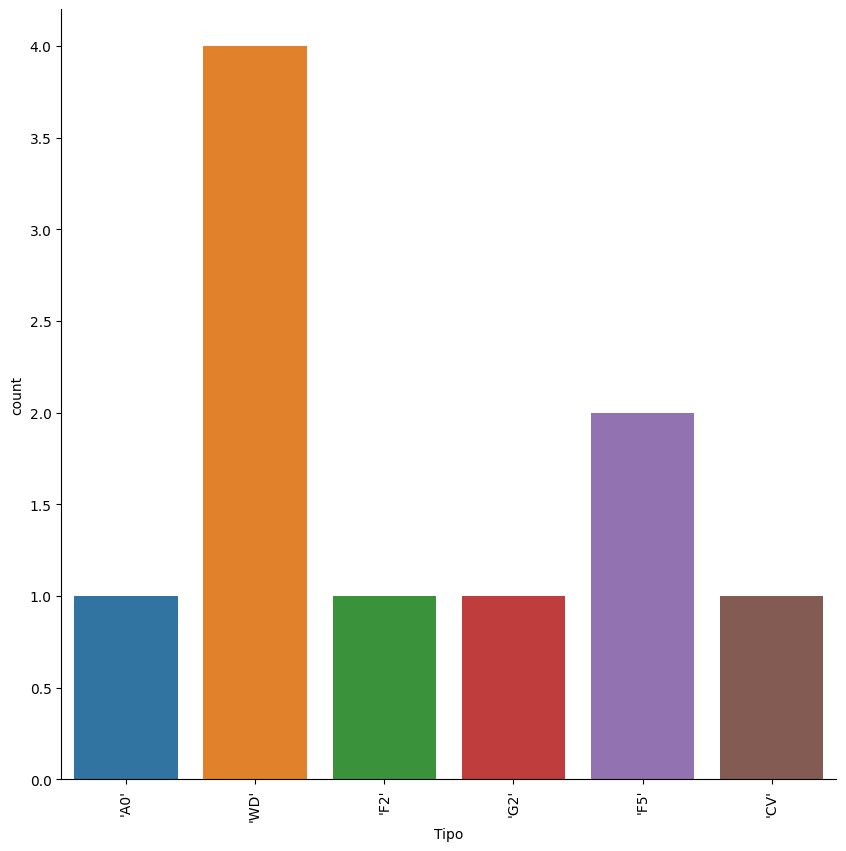

In [9]:
import seaborn as sns # pip install seaborn

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f)

sns.countplot(x = 'Tipo', data = dfGR, linewidth=.5)
plt.xticks(rotation=90,fontsize=10)

# Grafíca los espectro, no pulsar!!!

In [ ]:


""" import plotly.graph_objects as go

for index, row in dfGR.iterrows():
    # Creamos una figura para cada fila
    fig = go.Figure()
    
    # Añadimos una línea para cada punto de la gráfica
    fig.add_trace(go.Scatter(x=row[0], y=row[1], mode='lines', line=dict(color='black', width=1), name='Espectro'))
    fig.add_trace(go.Scatter(x=row[0], y=row[2], mode='lines', line=dict(color='gray', width=2), name='Error en la intensidad'))
    #fig.add_trace(go.Scatter(x=row[0], y=, mode='lines', line=dict(color='red', width=1), name='Origen'))
    fig.update_layout(title=f'Estrela de tipo {row[3]}',xaxis_title='Longitud de onda [Å]', 
                      yaxis_title="Intensidad [1E-17 erg/cm2/s/Å]",
                      plot_bgcolor="white",paper_bgcolor="white")
    # Mostramos la figura
    fig.show() """

In [ ]:
""" for index, row in dfGR.iterrows():
    fig = go.Figure(go.Scatter(
        x=row[0],
        y=row[1],
        mode='lines', line=dict(color='black', width=1), name='Espectro',
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=row[2],
            visible=True, color='gray', width=1)
    ))

    fig.show() """

In [13]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold

from sklearn import model_selection
import numpy as np


dummies = pd.get_dummies(dfML['Tipo'])

dfMLdummies = pd.concat([dfML, dummies], axis=1)

dfMLdummies.drop('Tipo', axis=1, inplace=True)


dfMLdummies.reset_index(drop=True, inplace = True)

dfMLdummies.head()



,Longitud de onda [Å] VS Intensidad [1E-17 erg/cm2/s/Å],Longitud de onda [Å] VS Error,'A0','CV','F2','F5','G2','WD'
0,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",1,0,0,0,0,0
1,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",0,0,0,0,0,1
2,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",0,0,1,0,0,0
3,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",0,0,0,0,0,1
4,"[3788.785337484371, 3789.657837994716, 3790.53...","[3788.785337484371, 3789.657837994716, 3790.53...",0,0,0,0,0,1


In [14]:
dummies = pd.get_dummies(dfML2['Tipo'])

dfMLdummies2 = pd.concat([dfML2, dummies], axis=1)

dfMLdummies2.drop('Tipo', axis=1, inplace=True)


dfMLdummies2.reset_index(drop=True, inplace = True)

dfMLdummies2.head()

,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å],'A0','CV','F2','F5','G2','WD'
0,3788.785337,21.111200,1,0,0,0,0,0
1,3789.657838,21.103901,1,0,0,0,0,0
2,3790.530539,21.096600,1,0,0,0,0,0
3,3791.403442,21.089399,1,0,0,0,0,0
4,3792.276545,21.082100,1,0,0,0,0,0


In [17]:
from sklearn.decomposition import PCA

# Supongamos que tenemos un dataframe llamado "df" con 10 columnas
# y queremos reducirlo a solo 3 componentes principales

# Creamos una instancia de PCA con 3 componentes
pca = PCA(n_components=len(dfGR['Tipo'].value_counts())+2)

# Ajustamos el modelo a nuestros datos y transformamos el dataframe
df_reduced = pd.DataFrame(pca.fit_transform(dfMLdummies2))

df_reduced.head()

# df_reduced ahora es un numpy array con 3 columnas


,0,1,2,3,4,5,6,7
0,-2316.526048,-135.992926,-0.591726,-0.267763,0.53089,-0.572229,-0.197323,-2.162110e-16
1,-2315.653599,-135.980967,-0.591716,-0.267756,0.53089,-0.572229,-0.197341,2.974153e-16
2,-2314.780949,-135.969006,-0.591706,-0.267749,0.53089,-0.572229,-0.197359,5.996032e-14
3,-2313.908100,-135.956939,-0.591696,-0.267742,0.53089,-0.572229,-0.197377,1.113949e-14
4,-2313.035048,-135.944967,-0.591687,-0.267736,0.53089,-0.572229,-0.197395,-4.808900e-14


In [19]:
from sklearn.manifold import TSNE

# Supongamos que tenemos un dataframe llamado "df" con 10 columnas
# y queremos reducirlo a solo 2 dimensiones utilizando t-SNE

# Creamos una instancia de t-SNE con 2 dimensiones
tsne = TSNE(n_components=3)

# Ajustamos el modelo a nuestros datos y transformamos el dataframe
df_reduced2 = pd.DataFrame(tsne.fit_transform(dfMLdummies2))

df_reduced2.head()

# df_reduced ahora es un numpy array con 2 columnas


In [ ]:
import umap.umap_ as umap

# Supongamos que tenemos un dataframe llamado "df" con 10 columnas
# y queremos reducirlo a solo 2 dimensiones utilizando UMAP

# Creamos una instancia de UMAP con 2 dimensiones
umap_model = umap.UMAP(n_components=len(dfGR['Tipo'].value_counts())+2)

# Ajustamos el modelo a nuestros datos y transformamos el dataframe
df_reduced3 = pd.DataFrame(umap_model.fit_transform(dfMLdummies2))

df_reduced3.head()

# df_reduced ahora es un numpy array con 2 columnas


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alvar\Documents\Tercero\Mineria de dato

,0,1,2
0,1.126119,-7.091356,-2.888870
1,1.123170,-7.092899,-2.885906
2,1.123109,-7.092301,-2.886528
3,1.118946,-7.096294,-2.882411
4,1.107091,-7.098445,-2.873012


# Modelos supervisados de clasificación
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(),
    MLPClassifier(),
]

# Modelos supervisados de regresión
regressors = [
    svm.SVR(),
    tree.DecisionTreeRegressor(),
    linear_model.LinearRegression(),
    neighbors.KNeighborsRegressor(),
]

# Modelos no supervisados de clustering
clustering = [
    KMeans(),
]

# Modelos no supervisados de reducción de dimensionalidad
dimensionality_reduction = [
    discriminant_analysis.LinearDiscriminantAnalysis(),
    gaussian_process.GaussianProcessClassifier(),
]

# Modelos de clasificación

## Número de clusters

### Método del codo

c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

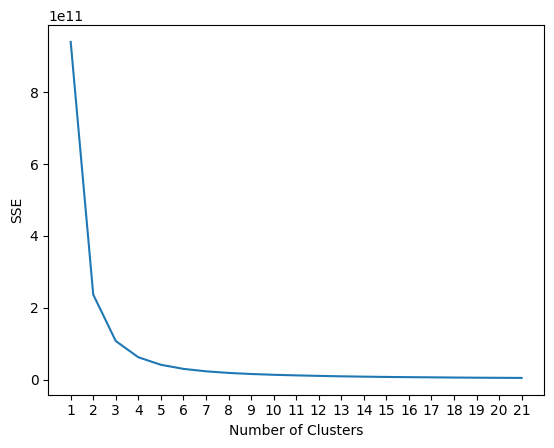

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# create numpy arrays for input data
X1 = np.array(dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']])
#X2 = dfMLdummies['Longitud de onda [Å] VS Error'].tolist()



#create list to hold SSE values for each k

sse = []
sse2 = []


for k in range(1, len(dfML['Tipo'].value_counts()+1)):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X1)
    sse.append(kmeans.inertia_)
    #kmeans = KMeans(n_clusters=k, random_state=2).fit(X2)
    #sse2.append(kmeans.inertia_)


#visualize results
plt.plot(range(1, len(dfML['Tipo'].value_counts()+1)), sse)
#plt.plot(range(1, len(dfML['Tipo'].value_counts()+1)), sse2)
plt.xticks(range(1, len(dfML['Tipo'].value_counts()+1)))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Método de shillouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

# Creamos una lista con los datos del dataframe
X =  np.array(dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']])
#Y = dfMLdummies['Longitud de onda [Å] VS Error'].tolist()

# Calculamos el silhouette score para diferentes valores de k
sil_scores = []
sil_scores2 = []
for k in range(2, len(dfML['Tipo'].value_counts()-1)):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    print(f"k={k}: silhouette score = {sil_score}")
    #kmeans = KMeans(n_clusters=k, random_state=2).fit(Y)
    #sil_score2 = silhouette_score(Y, kmeans.labels_)
    #sil_scores2.append(sil_score2)
    #print(f"k={k}: silhouette score = {sil_score2}")

# Mostramos una gráfica con los resultados
import matplotlib.pyplot as plt

plt.plot(range(2, len(dfML['Tipo'].value_counts()-1)), sil_scores)
#plt.plot(range(2, len(dfML['Tipo'].value_counts()-1)), sil_scores2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette score')
plt.show()


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = np.array(dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']])

range_n_clusters = []
for i in range(2, len(dfML['Tipo'].value_counts()-1)):
    range_n_clusters.append(i)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.cm as cm

from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']]  # we only take the first two features.
Y = dfML['Tipo']

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]



figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets

X = dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']]
y = dfMLdummies2.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

okey = pd.DataFrame(MinMaxScaler().fit_transform(dfMLdummies2), columns=dfMLdummies2.columns)

target = okey.iloc[:, 2:]

dats = okey.iloc[:, :2]

dats.reset_index(drop=True, inplace = True)

dats.head()

X_train, X_test, y_train, y_test = train_test_split(dats,
                                                    target,
                                                    test_size=0.35,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (250879, 2)
Number transactions y_train dataset:  (250879, 22)
Number transactions X_test dataset:  (135089, 2)
Number transactions y_test dataset:  (135089, 22)


In [35]:
models = []
#models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
#                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
#models.append(('SVM', SVC(gamma='auto', random_state=7)))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('Decision Tree Classifier',
#               DecisionTreeClassifier(random_state=7)))
#models.append(('Gaussian NB', GaussianNB()))
#models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

In [ ]:
models = []
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=7)))


In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forest,NaN,NaN,NaN,NaN


## Logistic regression

## SVM

# Realizamos una app